# NLP Assignment 3 – Binary Text Classification
Author: Joane Aristilde  
Course: NLP – Text Classification with Real-World Datasets  
Datasets: SMS Spam | IMDB Reviews | Disaster Tweets


In [9]:
# STEP 1: Setup Environment and Clone Repo
!git clone https://github.com/Jaristilde/NLP_Assignment3_Text-Classification_sept26.git
%cd NLP_Assignment3_Text-Classification_sept26
!pip install -r requirements.txt

Cloning into 'NLP_Assignment3_Text-Classification_sept26'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 62 (delta 12), reused 50 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (62/62), 25.93 MiB | 18.90 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/NLP_Assignment3_Text-Classification_sept26/NLP_Assignment3_Text-Classification_sept26


In [10]:
# --- 🔁 Sync the latest updates from GitHub ---
!git fetch origin main
!git reset --hard origin/main
!git pull origin main

From https://github.com/Jaristilde/NLP_Assignment3_Text-Classification_sept26
 * branch            main       -> FETCH_HEAD
HEAD is now at d445381 Amazon review update
From https://github.com/Jaristilde/NLP_Assignment3_Text-Classification_sept26
 * branch            main       -> FETCH_HEAD
Already up to date.


In [11]:
!pwd
!ls

/content/NLP_Assignment3_Text-Classification_sept26/NLP_Assignment3_Text-Classification_sept26
amazon_confusion_matrix.png	   notebooks
amazon_review_model.pkl		   README.md
amazon_review_vectorizer.pkl	   requirements.txt
confusion_matrix.png		   roc_curve.png
data				   src
feature_importance.csv		   tests
large_scale_amazon_model.pkl	   text_classification_model.pkl
large_scale_amazon_vectorizer.pkl  tfidf_vectorizer.pkl
large_scale_confusion_matrix.png


In [12]:
!pip install -r requirements.txt

In [13]:
# STEP 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
# STEP 3: Load Dataset
data_path = "data/spam.csv"
df = pd.read_csv(data_path, encoding='latin-1')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
# STEP 4: Preprocess Text (example structure, fill with your logic)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return " ".join(text)

df['clean_text'] = df['v2'].apply(clean_text)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think go usf life around though


              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.96      0.73      0.83       150

    accuracy                           0.96      1115
   macro avg       0.96      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



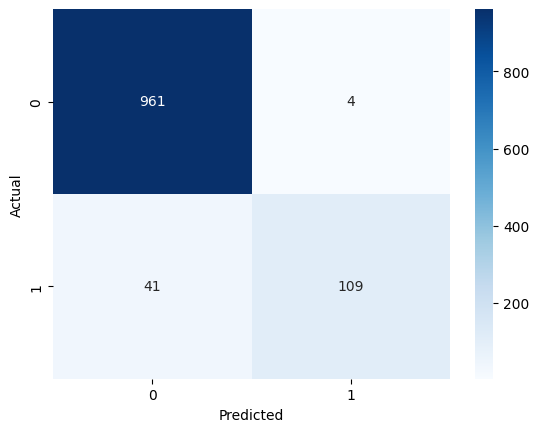

In [16]:
# STEP 5: Train/Test Split, Vectorize, and Train Model
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['v1'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# STEP 6: Evaluate
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#2. IMDB Movie Reviews Dataset (50K)

In [17]:
# Pull the newest updates from your GitHub repo
!git fetch origin main
!git reset --hard origin/main
!git pull origin main

From https://github.com/Jaristilde/NLP_Assignment3_Text-Classification_sept26
 * branch            main       -> FETCH_HEAD
HEAD is now at d445381 Amazon review update
From https://github.com/Jaristilde/NLP_Assignment3_Text-Classification_sept26
 * branch            main       -> FETCH_HEAD
Already up to date.


In [18]:
!pwd
!ls

/content/NLP_Assignment3_Text-Classification_sept26/NLP_Assignment3_Text-Classification_sept26
amazon_confusion_matrix.png	   notebooks
amazon_review_model.pkl		   README.md
amazon_review_vectorizer.pkl	   requirements.txt
confusion_matrix.png		   roc_curve.png
data				   src
feature_importance.csv		   tests
large_scale_amazon_model.pkl	   text_classification_model.pkl
large_scale_amazon_vectorizer.pkl  tfidf_vectorizer.pkl
large_scale_confusion_matrix.png


In [19]:
!python src/clean_text_classification_imdb.py

Dataset Information:
Shape: (50000, 2)

First few rows:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Column Names:
[' review', 'sentiment']

Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64
sentiment
positive    50.00%
negative    50.00%
Name: proportion, dtype: object

Original vs Processed Text:
Original: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The...
Processed: one reviewer mentioned watching oz episode youll hooked right exactly happened mebr br first thing s...

Original: A wonderful little production. <br /><br />The filming technique is very unassuming-

In [20]:
!python src/clean_text_classification_SMS_Spam.py

Dataset Information:
Shape: (5572, 5)

First few rows:
     v1  ... Unnamed: 4
0   ham  ...        NaN
1   ham  ...        NaN
2  spam  ...        NaN
3   ham  ...        NaN
4   ham  ...        NaN

[5 rows x 5 columns]

Column Names:
['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

Class distribution:
v1
ham     4825
spam     747
Name: count, dtype: int64
v1
ham     86.59%
spam    13.41%
Name: proportion, dtype: object

Original vs Processed Text:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a...
Processed: go jurong point crazy available bugis n great world la e buffet cine got amore wat...

Original: Ok lar... Joking wif u oni......
Processed: ok lar joking wif u oni...

Training set size: 4457 samples
Testing set size: 1115 samples
Number of features: 1183

Accuracy: 0.9794

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
      

In [22]:

!python src/AmazonReview.py

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100% 493M/493M [00:07<00:00, 72.2MB/s]
Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/bittlingmayer/amazonreviews/versions/7

Loading and preprocessing the data...
Traceback (most recent call last):
  File "/content/NLP_Assignment3_Text-Classification_sept26/NLP_Assignment3_Text-Classification_sept26/src/AmazonReview.py", line 299, in <module>
    main()
  File "/content/NLP_Assignment3_Text-Classification_sept26/NLP_Assignment3_Text-Classification_sept26/src/AmazonReview.py", line 145, in main
    df = load_amazon_reviews(dataset_path, sample_size=20000)  # Using 20k reviews to avoid memory issues
         ^^^^^^^^^^^^